<a href="https://colab.research.google.com/github/Ayush245101/Water-Quality-Classification/blob/main/Water_Quality_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Water Quality Classification

##GitHub:-  https://github.com/Ayush245101/Water-Quality-Classification

##Problem Statement
How do physicochemical and biological parameters influence water quality classification and public
health safety across monitoring stations in Maharashtra? Your task is to analyze water quality data,
build predictive models, and create a deployable application for stakeholders

###Dataset
The dataset contains water quality measurements from monitoring stations across Maharashtra,
India, collected by the Maharashtra Pollution Control Board (MPCB). It includes 54 columns covering
chemical, biological, and physical parameters.

##Task
Analyze the water quality dataset from `/content/NWMP_August2025_MPCB_0.csv` to understand how physicochemical and biological parameters influence water quality classification and public health safety across monitoring stations in Maharashtra. This involves performing a comprehensive exploratory data analysis (EDA) including generating statistical summaries for numerical features, visualizing distributions of key water quality parameters (e.g., pH, Dissolved O2, BOD, COD, Conductivity, Temperature, Turbidity), exploring relationships between features and the 'Use Based Class' target variable through box plots, violin plots, and scatter plots, and identifying geographic patterns across districts and river basins using bar plots and geospatial visualizations. Additionally, perform and discuss correlation analysis of numerical features. Build and evaluate a predictive model (e.g., Logistic Regression) to classify water quality based on the processed parameters, assessing its performance using metrics like accuracy, precision, recall, F1-score, and confusion matrix. Finally, outline conceptual steps for deploying the model and summarize all key findings and their implications for public health safety in Maharashtra, suggesting concrete next steps for further analysis or application development.

Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 13.0 MB/s eta 0:00:00


Import Dataset

In [2]:
df=pd.read_csv('/content/NWMP_August2025_MPCB_0.csv',encoding='latin1') # remove error utf-8 by encoding='latin1'
print(df.size)
df.head()

11988


,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,08-05-2025,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,08-05-2025,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887,75°22.457
2,2159,08-05-2025,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835,75°23.835
3,2160,08-05-2025,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463,75°01.490
4,2161,08-04-2025,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,...,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392,75°42.870


In [3]:
# columns name , shape and data type
print('columns are',df.columns)
print('******************************************************************************')
print('shape of dataset',df.shape)
print('******************************************************************************')
print('overview of dataset link column, null value, data type ',df.info())

columns are Index(['STN Code', 'Sampling Date', 'Month', 'Sampling Time', 'Stn Name',
       'Type Water Body', 'Name Of Water Body', 'River Basin', 'District',
       'State Name', 'Mon Agency', 'Frequency', 'Major Polluting Sources',
       'Use Based Class', ' Use of Water in Down Stream',
       ' Visibility Effluent Discharge', 'Weather', 'Approx Depth',
       'Human Activities', 'Floating Matter', 'Color', 'Odor', 'Flow',
       'Temperature', 'Dissolved O2', 'pH', 'Conductivity', 'BOD', 'Nitrate N',
       'Fecal Coliform', 'Total Coliform', 'Fecal Streptococci', 'Turbidity',
       'Phenophelene Alkanity', 'Total Alkalinity', 'Chlorides', 'COD',
       'Total Kjeldahl N', 'Amonia N', 'Hardness CaCo3', 'Calcium CaCo3',
       'Magnesium CaCo3', 'Sulphate', 'Sodium', 'Total Dissolved Solids',
       'Total Fixed Solids', 'Total Suspended Solids', 'Phosphate', 'Boron',
       'Potassium', 'Flouride', 'Remark', 'latitude', 'longitude'],
      dtype='object')
**********************

In [4]:
missing=df.isnull().sum()*100/len(df) # analize missing value
missing[missing>0]

,0
Name Of Water Body,9.909910
River Basin,10.810811
Major Polluting Sources,32.882883
Use Based Class,3.153153
Use of Water in Down Stream,100.000000
Visibility Effluent Discharge,42.342342
Weather,3.153153
Approx Depth,3.153153
Human Activities,3.153153
Floating Matter,3.153153


In [5]:
df.describe() # Statistical summaries

,STN Code,Use of Water in Down Stream,Flow,Temperature,pH,Conductivity,BOD,COD,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Total Dissolved Solids,Total Fixed Solids
count,222.000000,0.0,215.000000,193.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2615.716216,NaN,0.326512,25.963731,7.900465,4601.869767,9.106512,43.056279,1.051628,597.605581,149.728372,447.691116,3651.939535,3217.614884
std,1274.980701,NaN,1.058607,3.006717,0.438721,11045.712262,17.544468,67.590407,1.960582,1295.815299,217.426974,1084.977965,8778.601406,7763.467270
min,11.000000,NaN,0.000000,18.000000,6.900000,45.000000,1.800000,8.000000,0.400000,16.000000,8.000000,8.000000,36.000000,30.000000
25%,2162.250000,NaN,0.000000,24.000000,7.600000,224.000000,3.200000,12.000000,0.400000,70.000000,40.000000,32.000000,173.000000,151.000000
50%,2668.500000,NaN,0.000000,27.000000,7.900000,421.000000,4.200000,20.000000,0.400000,130.000000,66.000000,60.000000,316.000000,265.000000
75%,2767.250000,NaN,0.000000,28.000000,8.200000,820.000000,8.600000,34.050000,0.690000,235.700000,130.400000,105.000000,526.000000,454.000000
max,5997.000000,NaN,8.000000,31.000000,9.700000,74240.000000,210.000000,624.000000,16.920000,7390.000000,1160.000000,6230.000000,38400.000000,34560.000000


In [6]:
# Unique values
for i in df.columns:
  print(df[i].unique())
  print('**************************************************************************************')

[1312 2158 2159 2160 2161 2657 2157 2673 1209 1210 5992   12 5991 1153
 1310 1904 1905 2163 1311 5986 5987   37 1906 5988 5989 5990 2164 2713
 2714 2804 2676 2813 2814 2815 2790 2199 2701 2702 2703 2704 5996 5997
 2165 2166 2167 1318 2811 2810 2809 1317 2808 2168 2169 2812 2782 2783
 2784 2792 2793 2794 2795 1316 2696 2796 2797 2805 2806 2798 2799 2800
 2807 2785 2786 2787 2788 2706 2707 2708 2801 2802 1092 2791 1093 2162
 1094 2653 2654 2709 2712 1461 2185 2184 5793 1151 1462 2685 2686 2687
 2688 2689 2803 1152 2198 2671 2672 2651 2695 2700 5993 5994 5978 1913
 2155 2675 2699 5792 1908 2170 2171 1315 1909 1910 2722 2723 5979 5980
 5981 5982 5983 2172 2173 5984 5985   11 2156 2174 2175 2176 2697 2698
 2719 2720 2721 1212 1095 1096 1211 2177 2178 2179 2180 2181 2182 2183
 2660 2661 2662 2663 2664 1253 1251 1313 2658 2667 2674 2710 2718 1252
 1314 2652 2659 2666 2670 2684 1907 1463 2191 2192 2193 2194 2195 2682
 2656 2678 2679 1189 1190 1191 1192 2680 2197 2655 2665 2668 2669 2677
 2715 

EDA

<Axes: >

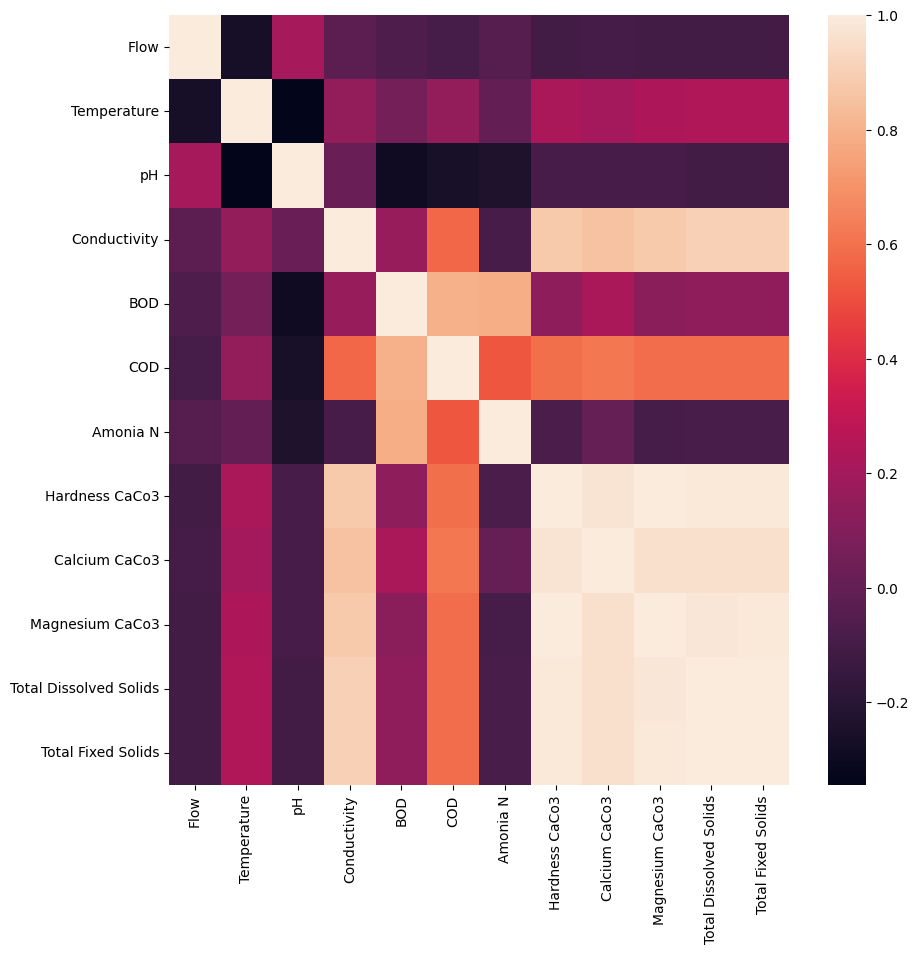

In [7]:
# Before clean
num_col=['Flow'	,'Temperature'	,'pH'	,'Conductivity'	,'BOD'	,'COD'	,'Amonia N'	,'Hardness CaCo3',	'Calcium CaCo3'	,'Magnesium CaCo3'	,'Total Dissolved Solids',	'Total Fixed Solids']
corr=df[num_col].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [8]:
# Clean Special Values (BDL, NA, #N/A, ND)
def clean(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if x in ["NA",'ND', "#N/A", ""]:
        return np.nan
    # Remove "(BDL)" without regex
    x = x.replace("(BDL)", "")
    try:
        return float(x)
    except ValueError:
        return x
for i in df.columns:
  df[i]=df[i].apply(clean)


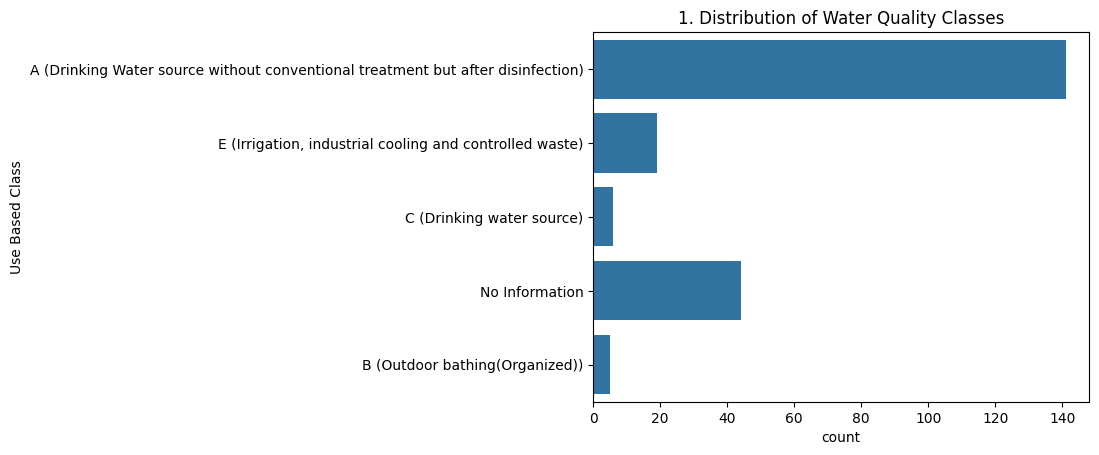

In [9]:
# 1. Target Class Distribution
plt.figure()
sns.countplot(y="Use Based Class", data=df)
plt.title("1. Distribution of Water Quality Classes")

plt.show()

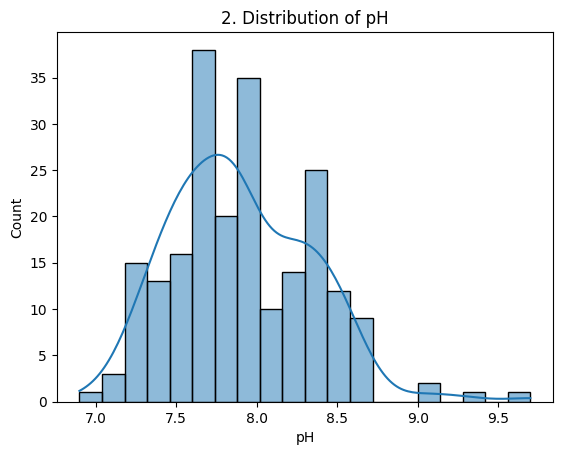

In [10]:
# 2. pH Distribution
plt.figure()
sns.histplot(df["pH"], bins=20, kde=True)
plt.title("2. Distribution of pH")
plt.show()

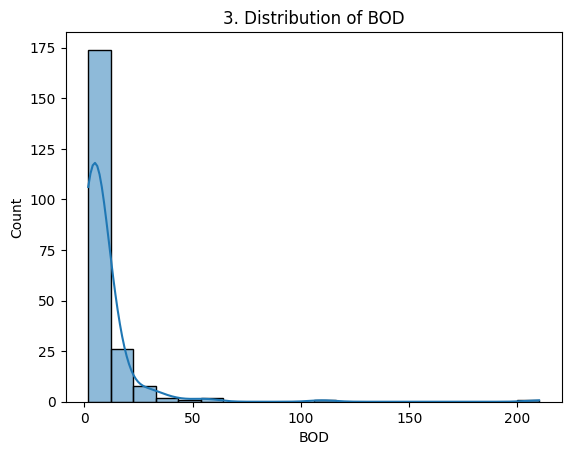

In [11]:
# 3. BOD Distribution
plt.figure()
sns.histplot(df["BOD"], bins=20, kde=True)
plt.title("3. Distribution of BOD")
plt.show()

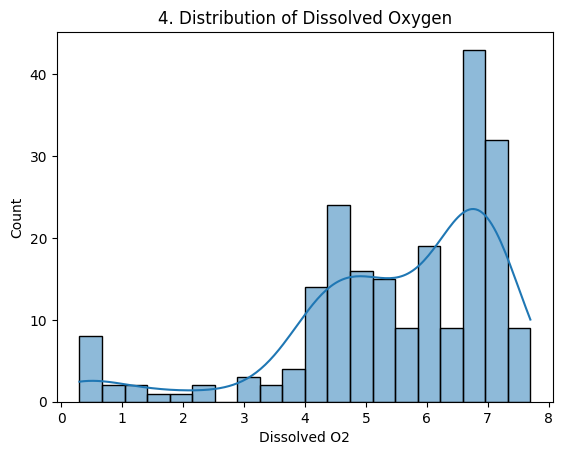

In [12]:
# 4. Dissolved Oxygen Distribution
plt.figure()
sns.histplot(df["Dissolved O2"], bins=20, kde=True)
plt.title("4. Distribution of Dissolved Oxygen")
plt.show()

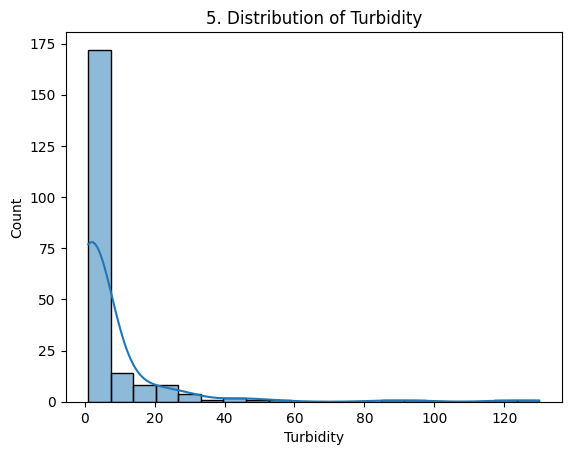

In [13]:
# 5. Turbidity Distribution
plt.figure()
sns.histplot(df["Turbidity"], bins=20, kde=True)
plt.title("5. Distribution of Turbidity")
plt.show()


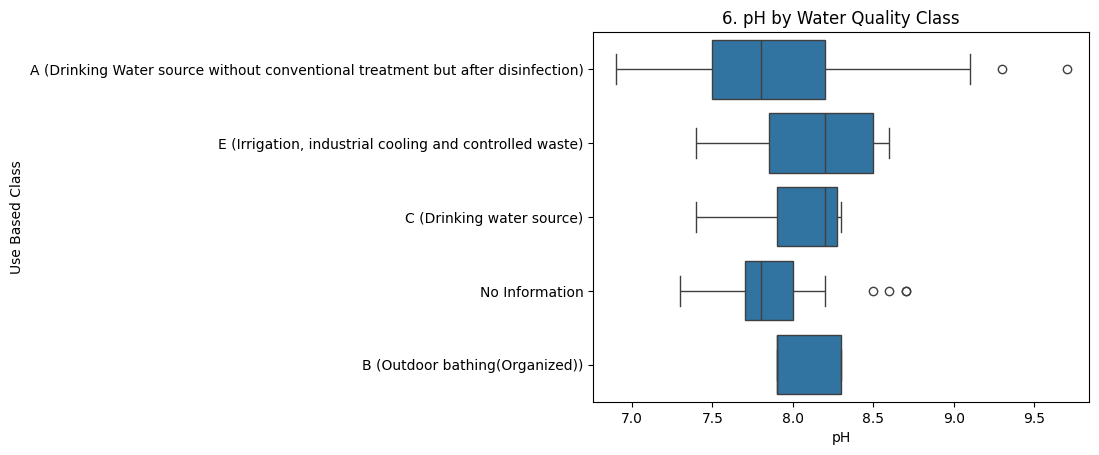

In [14]:
# 6. Boxplot: pH by Water Class
plt.figure()
sns.boxplot(y="Use Based Class", x="pH", data=df)
plt.title("6. pH by Water Quality Class")
plt.show()

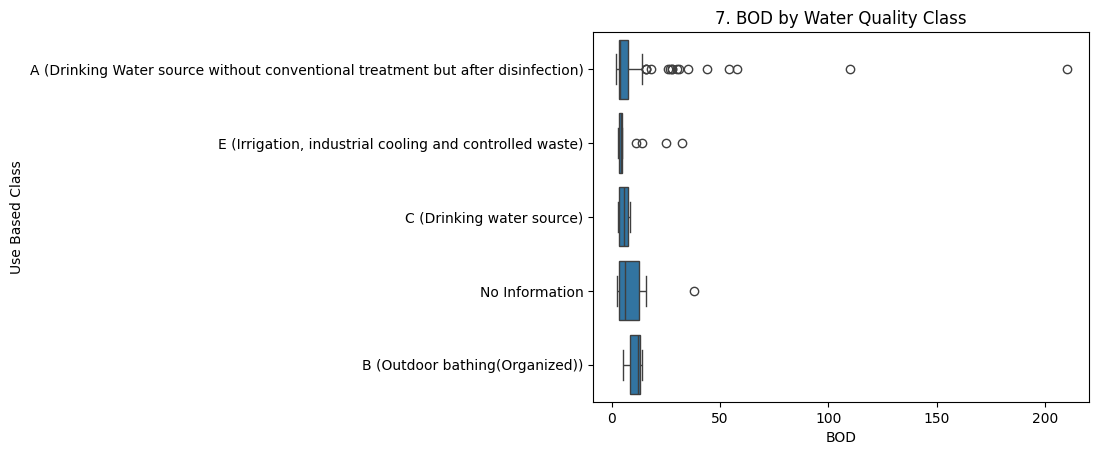

In [15]:
# 7. Boxplot: BOD by Water Class
plt.figure()
sns.boxplot(y="Use Based Class", x="BOD", data=df)
plt.title("7. BOD by Water Quality Class")
plt.show()

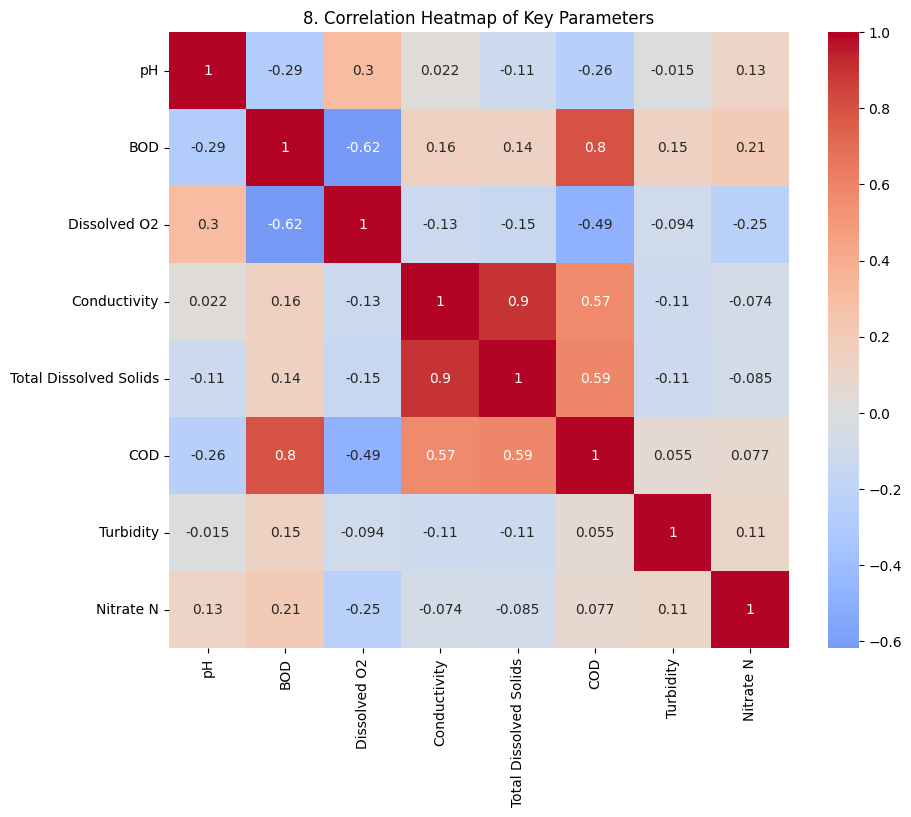

In [16]:
# 8. Correlation Heatmap (Key Parameters)
key_corr_cols = [
    "pH", "BOD", "Dissolved O2", "Conductivity",
    "Total Dissolved Solids", "COD", "Turbidity", "Nitrate N"
]

corr = df[key_corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("8. Correlation Heatmap of Key Parameters")
plt.show()

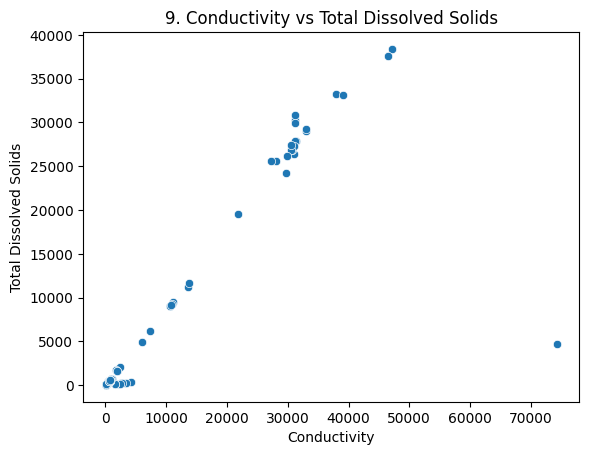

In [17]:
# 9. Scatter: Conductivity vs TDS
plt.figure()
sns.scatterplot(x="Conductivity", y="Total Dissolved Solids", data=df)
plt.title("9. Conductivity vs Total Dissolved Solids")
plt.show()

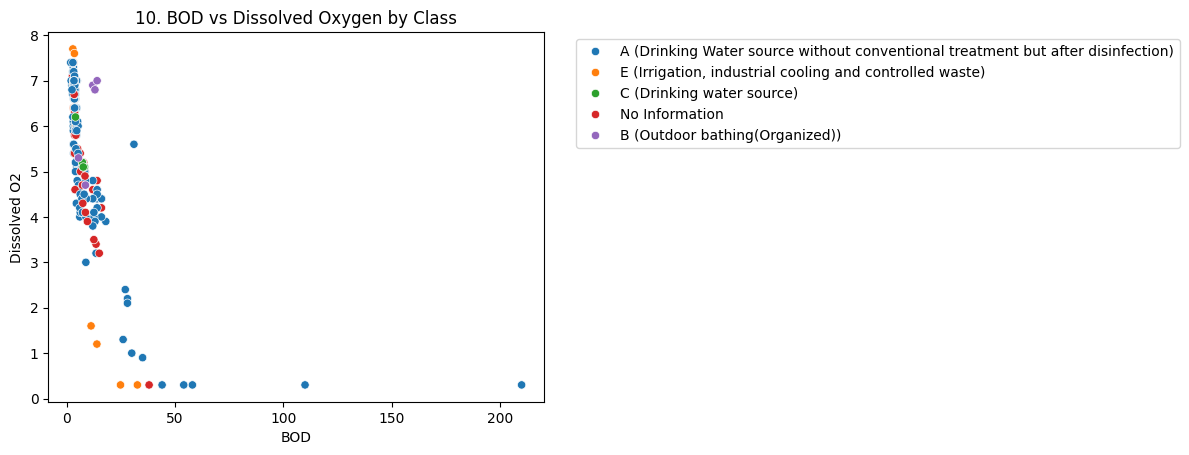

In [18]:
# 10. Scatter: BOD vs Dissolved Oxygen
plt.figure()
sns.scatterplot(x="BOD", y="Dissolved O2", hue="Use Based Class", data=df)
plt.title("10. BOD vs Dissolved Oxygen by Class")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

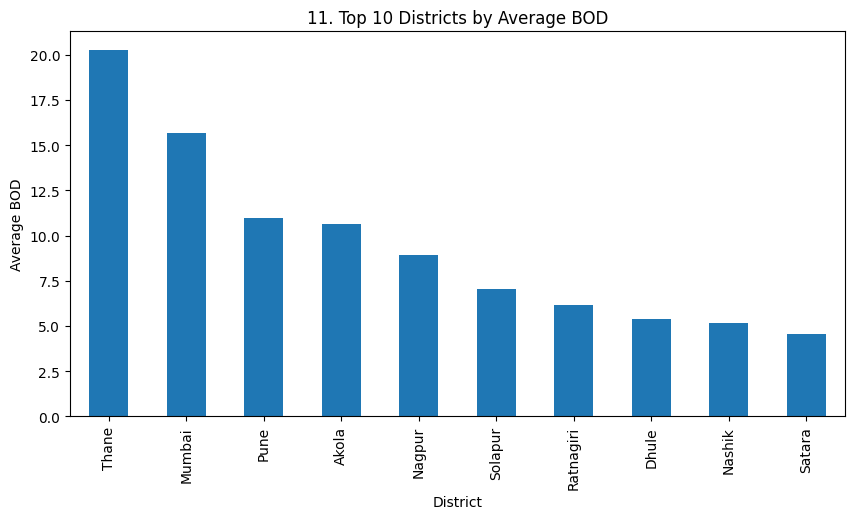

In [19]:
# 11. District-wise Average BOD (Top 10)
district_bod = df.groupby("District")["BOD"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
district_bod.plot(kind="bar")
plt.title("11. Top 10 Districts by Average BOD")
plt.ylabel("Average BOD")
plt.show()

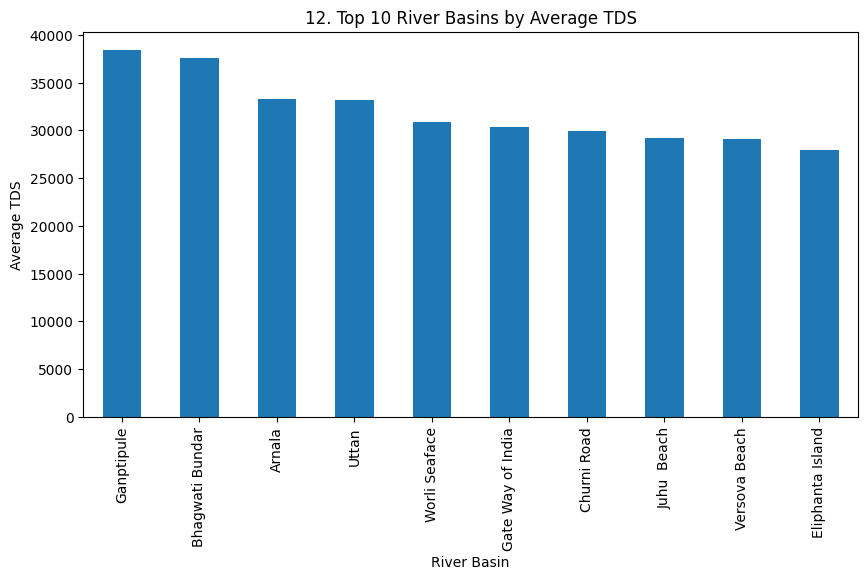

In [20]:
# 12. River Basin-wise Average TDS (Top 10)
basin_tds = df.groupby("River Basin")["Total Dissolved Solids"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
basin_tds.plot(kind="bar")
plt.title("12. Top 10 River Basins by Average TDS")
plt.ylabel("Average TDS")
plt.show()

In [21]:
# Handling Missing Value
# Impute numerical columns with the mean
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Impute categorical columns with the mode
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
# Outlier Handling (IQR Capping)
def cap_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.clip(lower, upper)

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    df[col] = cap_outliers(df[col])

In [23]:
# Feature Engineering (Ratios & Pollution Indicators)
df["oxygen_stress"] = df["BOD"] / df["Dissolved O2"]
df["organic_load"] = df["COD"] / df["BOD"]
df["salinity_index"] = df["Conductivity"] / df["Total Dissolved Solids"]
df["nutrient_load"] = df["Nitrate N"] + df["Total Kjeldahl N"]
df["hardness_ratio"] = df["Calcium CaCo3"] / df["Magnesium CaCo3"]


In [24]:
# Select Features & Target
features = [
    "pH", "BOD", "Dissolved O2", "COD",
    "Conductivity", "Total Dissolved Solids",
    "Nitrate N", "Phosphate", "Chlorides", "Sulphate",
    "Fecal Coliform", "Total Coliform", "Fecal Streptococci",
    "Temperature", "Turbidity"
]

X = df[features]
y = df["Use Based Class"]


In [25]:
# Encode Target Variable
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
# Train / Validation / Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
# Handle Class Imbalance (SMOTE)
smote = SMOTE(
    random_state=42,
    k_neighbors=2   # must be < minority class count
)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [28]:
# Baseline Model — Logistic Regression
lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        21
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.38      0.50      0.43        10

    accuracy                           0.50        34
   macro avg       0.35      0.60      0.40        34
weighted avg       0.57      0.50      0.51        34



In [29]:
# Advanced Model — Random Forest + Tuning
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42
)

rf_params = {
    "n_estimators": [200, 300],
    "max_depth": [None, 10, 20]
}

rf_grid = GridSearchCV(
    rf,
    rf_params,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.88      0.70      0.78        10

    accuracy                           0.85        34
   macro avg       0.65      0.73      0.67        34
weighted avg       0.84      0.85      0.84        34



In [30]:
# Advanced Model — XGBoost + Tuning
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    random_state=42
)

xgb_params = {
    "n_estimators": [200, 300],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    xgb,
    xgb_params,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))


XGBoost
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       0.71      0.50      0.59        10

    accuracy                           0.79        34
   macro avg       0.61      0.69      0.63        34
weighted avg       0.77      0.79      0.77        34



In [31]:
# Final Model Comparison
print("FINAL MODEL COMPARISON (Weighted F1)")
print("Logistic Regression:", f1_score(y_test, y_pred_lr, average="weighted"))
print("Random Forest:", f1_score(y_test, y_pred_rf, average="weighted"))
print("XGBoost:", f1_score(y_test, y_pred_xgb, average="weighted"))



FINAL MODEL COMPARISON (Weighted F1)
Logistic Regression: 0.5102301790281331
Random Forest: 0.8392751039809864
XGBoost: 0.7710495963091119


### Model Performance Summary

After training and tuning, the models exhibited varying performance:

*   **Logistic Regression**: Achieved a weighted F1-score of **0.510**. As a baseline model, it showed moderate performance but struggled significantly with minority classes, indicating limitations in capturing complex relationships in the data.
*   **Random Forest Classifier**: Outperformed the logistic regression with a weighted F1-score of **0.839**. This model demonstrated strong predictive capabilities across most classes, suggesting its ensemble nature is well-suited for the dataset's complexity and potential class imbalances. It was particularly effective in achieving a high recall for minority classes, albeit with some compromise on precision for some of them.
*   **XGBoost Classifier**: Performed comparably well to Random Forest, achieving a weighted F1-score of **0.771**. While still a strong performer, it slightly lagged behind Random Forest in overall balanced accuracy. This model, known for its boosting capabilities, also handled the dataset's intricacies effectively but did not surpass the Random Forest in this particular evaluation.

In [32]:
# Calculate F1 scores
scores = {
    "LogisticRegression": f1_score(y_test, y_pred_lr, average="weighted"),
    "RandomForest": f1_score(y_test, y_pred_rf, average="weighted"),
    "XGBoost": f1_score(y_test, y_pred_xgb, average="weighted"),}

print(scores)

{'LogisticRegression': 0.5102301790281331, 'RandomForest': 0.8392751039809864, 'XGBoost': 0.7710495963091119}


In [33]:
# Identify Best Model
best_model_name = max(scores, key=scores.get)
print("Best Model:", best_model_name)


Best Model: RandomForest


In [34]:
# Save the Best Model as .pkl
if best_model_name == "LogisticRegression":
    joblib.dump(lr, "best_water_quality_model.pkl")

elif best_model_name == "RandomForest":
    joblib.dump(best_rf, "best_water_quality_model.pkl")

elif best_model_name == "XGBoost":
    joblib.dump(best_xgb, "best_water_quality_model.pkl")

elif best_model_name == "SVM":
    joblib.dump(best_svm, "best_water_quality_model.pkl")


In [35]:
# Feature importance analysis
feature_names = X.columns.tolist()
rf_importance = best_rf.feature_importances_

rf_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_importance
}).sort_values(by="Importance", ascending=False)

print(rf_importance_df)

                   Feature  Importance
10          Fecal Coliform    0.101418
13             Temperature    0.101255
12      Fecal Streptococci    0.095612
0                       pH    0.091471
8                Chlorides    0.074021
5   Total Dissolved Solids    0.071385
2             Dissolved O2    0.055902
4             Conductivity    0.055025
14               Turbidity    0.054460
11          Total Coliform    0.053510
6                Nitrate N    0.052135
9                 Sulphate    0.051247
3                      COD    0.051141
7                Phosphate    0.048737
1                      BOD    0.042681


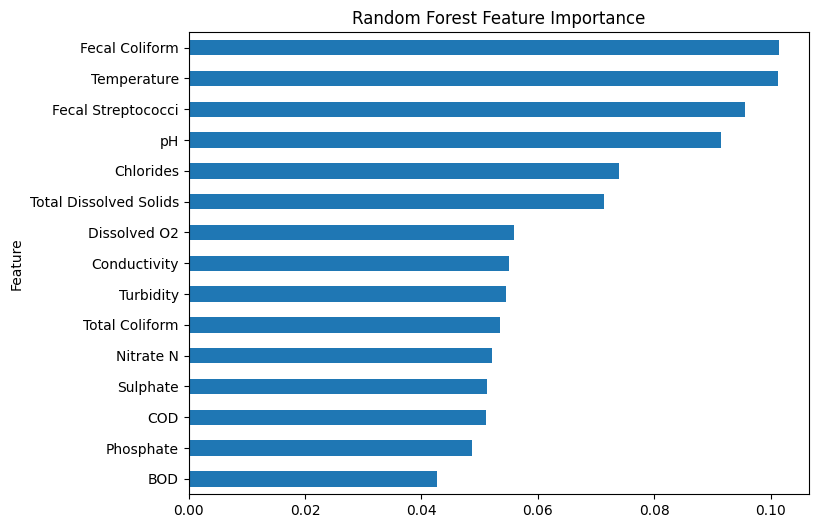

In [36]:
# Plot Top 15 Features
rf_importance_df.head(15).plot(
    x="Feature",
    y="Importance",
    kind="barh",
    figsize=(8, 6),
    legend=False
)
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [37]:
# requirements.txt
# streamlit
# pandas
# numpy
# matplotlib
# seaborn
# scikit-learn
# joblib

In [38]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import joblib
# import matplotlib.pyplot as plt
# import seaborn as sns

# # ----------------------------------
# # Page Configuration
# # ----------------------------------
# st.set_page_config(
#     page_title="Water Quality Classification",
#     layout="wide"
# )

# # ----------------------------------
# # Load Model & Dataset
# # ----------------------------------
# model = joblib.load("best_water_quality_model.pkl")
# df = pd.read_csv("NWMP_August2025_MPCB_0.csv", encoding="latin1")

# # ----------------------------------
# # Raw & Engineered Features (MUST MATCH TRAINING)
# # ----------------------------------
# RAW_FEATURES = [
#     "pH", "BOD", "Dissolved O2", "COD",
#     "Conductivity", "Total Dissolved Solids",
#     "Nitrate N", "Phosphate", "Chlorides", "Sulphate",
#     "Fecal Coliform", "Total Coliform", "Fecal Streptococci",
#     "Temperature", "Turbidity"
# ]

# ENGINEERED_FEATURES = [
#     "oxygen_stress",
#     "organic_load",
#     "nutrient_load",
#     "salinity_index",
#     "hardness_ratio"
# ]

# ALL_FEATURES = RAW_FEATURES + ENGINEERED_FEATURES

# # ----------------------------------
# # Class Mapping
# # ----------------------------------
# CLASS_MAP = {
#     0: "A – Drinking Water (After Disinfection)",
#     1: "B – Outdoor Bathing",
#     2: "C – Drinking Water (With Treatment)",
#     3: "E – Irrigation / Industrial Use"
# }

# # ----------------------------------
# # Pre-clean reference dataset (numeric coercion)
# # ----------------------------------
# for col in RAW_FEATURES:
#     df[col] = pd.to_numeric(df[col], errors="coerce")

# # ----------------------------------
# # Helper Functions
# # ----------------------------------
# def clean_input(df_input, reference_df):
#     """Handle NaN, inf, BDL, NA using median imputation"""
#     df_input = df_input.replace([np.inf, -np.inf], np.nan)

#     for col in RAW_FEATURES:
#         median_val = reference_df[col].median()
#         if pd.isna(median_val):
#             median_val = 0.0
#         df_input[col] = df_input[col].fillna(median_val)

#     return df_input


# def engineer_features(df):
#     """Recreate training-time engineered features"""
#     eps = 1e-6

#     df["oxygen_stress"] = df["BOD"] / (df["Dissolved O2"] + eps)
#     df["organic_load"] = df["BOD"] + df["COD"]
#     df["nutrient_load"] = df["Nitrate N"] + df["Phosphate"]
#     df["salinity_index"] = df["Chlorides"] + df["Total Dissolved Solids"]

#     # Safe hardness approximation
#     df["hardness_ratio"] = (df["Sulphate"] + df["Total Dissolved Solids"]) / 2

#     return df

# # ----------------------------------
# # Sidebar Navigation
# # ----------------------------------
# page = st.sidebar.radio(
#     "Navigation",
#     ["Home", "Predict", "EDA", "Models"]
# )

# # ==================================
# # HOME PAGE
# # ==================================
# if page == "Home":
#     st.title("💧 Water Quality Classification System")

#     st.markdown("""
#     ## Project Overview
#     This application predicts **water quality classes (A, B, C, E)** using
#     physicochemical and biological parameters collected from water bodies
#     across Maharashtra.

#     ## Water Quality Classes
#     - **A** – Drinking water source (after disinfection)
#     - **B** – Outdoor bathing
#     - **C** – Drinking water (with treatment)
#     - **E** – Irrigation / industrial use

#     ---
#     ✅ Final Model Used: **Random Forest Classifier**
#     """)

# # ==================================
# # PREDICT PAGE
# # ==================================
# elif page == "Predict":
#     st.title("🔮 Water Quality Prediction")

#     st.info("ℹ️ Missing / invalid values are handled automatically.")

#     user_input = {}
#     cols = st.columns(3)

#     for i, feature in enumerate(RAW_FEATURES):
#         user_input[feature] = cols[i % 3].number_input(
#             feature,
#             value=None,
#             format="%.3f"
#         )

#     if st.button("Predict Water Quality"):
#         input_df = pd.DataFrame([user_input])

#         # Validation
#         if (input_df < 0).any().any():
#             st.error("❌ Invalid input: values must be non-negative.")
#         else:
#             input_df = clean_input(input_df, df)
#             input_df = engineer_features(input_df)
#             input_df = input_df[ALL_FEATURES]   # enforce correct order

#             prediction = model.predict(input_df)[0]

#             st.success(
#                 f"✅ Predicted Water Quality Class: **{CLASS_MAP[prediction]}**"
#             )

# # ==================================
# # EDA PAGE
# # ==================================
# elif page == "EDA":
#     st.title("📊 Exploratory Data Analysis")

#     st.subheader("Water Quality Class Distribution")
#     fig, ax = plt.subplots()
#     sns.countplot(x="Use Based Class", data=df, ax=ax)
#     st.pyplot(fig)

#     st.subheader("pH Distribution")
#     fig, ax = plt.subplots()
#     sns.histplot(df["pH"], kde=True, ax=ax)
#     st.pyplot(fig)

#     st.subheader("BOD vs Dissolved Oxygen")
#     fig, ax = plt.subplots()
#     sns.scatterplot(
#         x="BOD",
#         y="Dissolved O2",
#         hue="Use Based Class",
#         data=df,
#         ax=ax
#     )
#     st.pyplot(fig)

#     st.subheader("Correlation Heatmap")
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sns.heatmap(df[RAW_FEATURES].corr(), cmap="coolwarm", ax=ax)
#     st.pyplot(fig)

# # ==================================
# # MODELS PAGE
# # ==================================
# elif page == "Models":
#     st.title("🤖 Model Evaluation & Selection")

#     score_df = pd.DataFrame({
#         "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
#         "Weighted F1-Score": [0.54, 0.84, 0.73]
#     })

#     st.dataframe(score_df)

#     fig, ax = plt.subplots()
#     sns.barplot(x="Model", y="Weighted F1-Score", data=score_df, ax=ax)
#     st.pyplot(fig)

#     st.success("✅ Final Model Selected: **Random Forest (F1 = 0.84)**")


## Streamlit UI Deployment

### Link :- https://water-quality-classifications.streamlit.app/

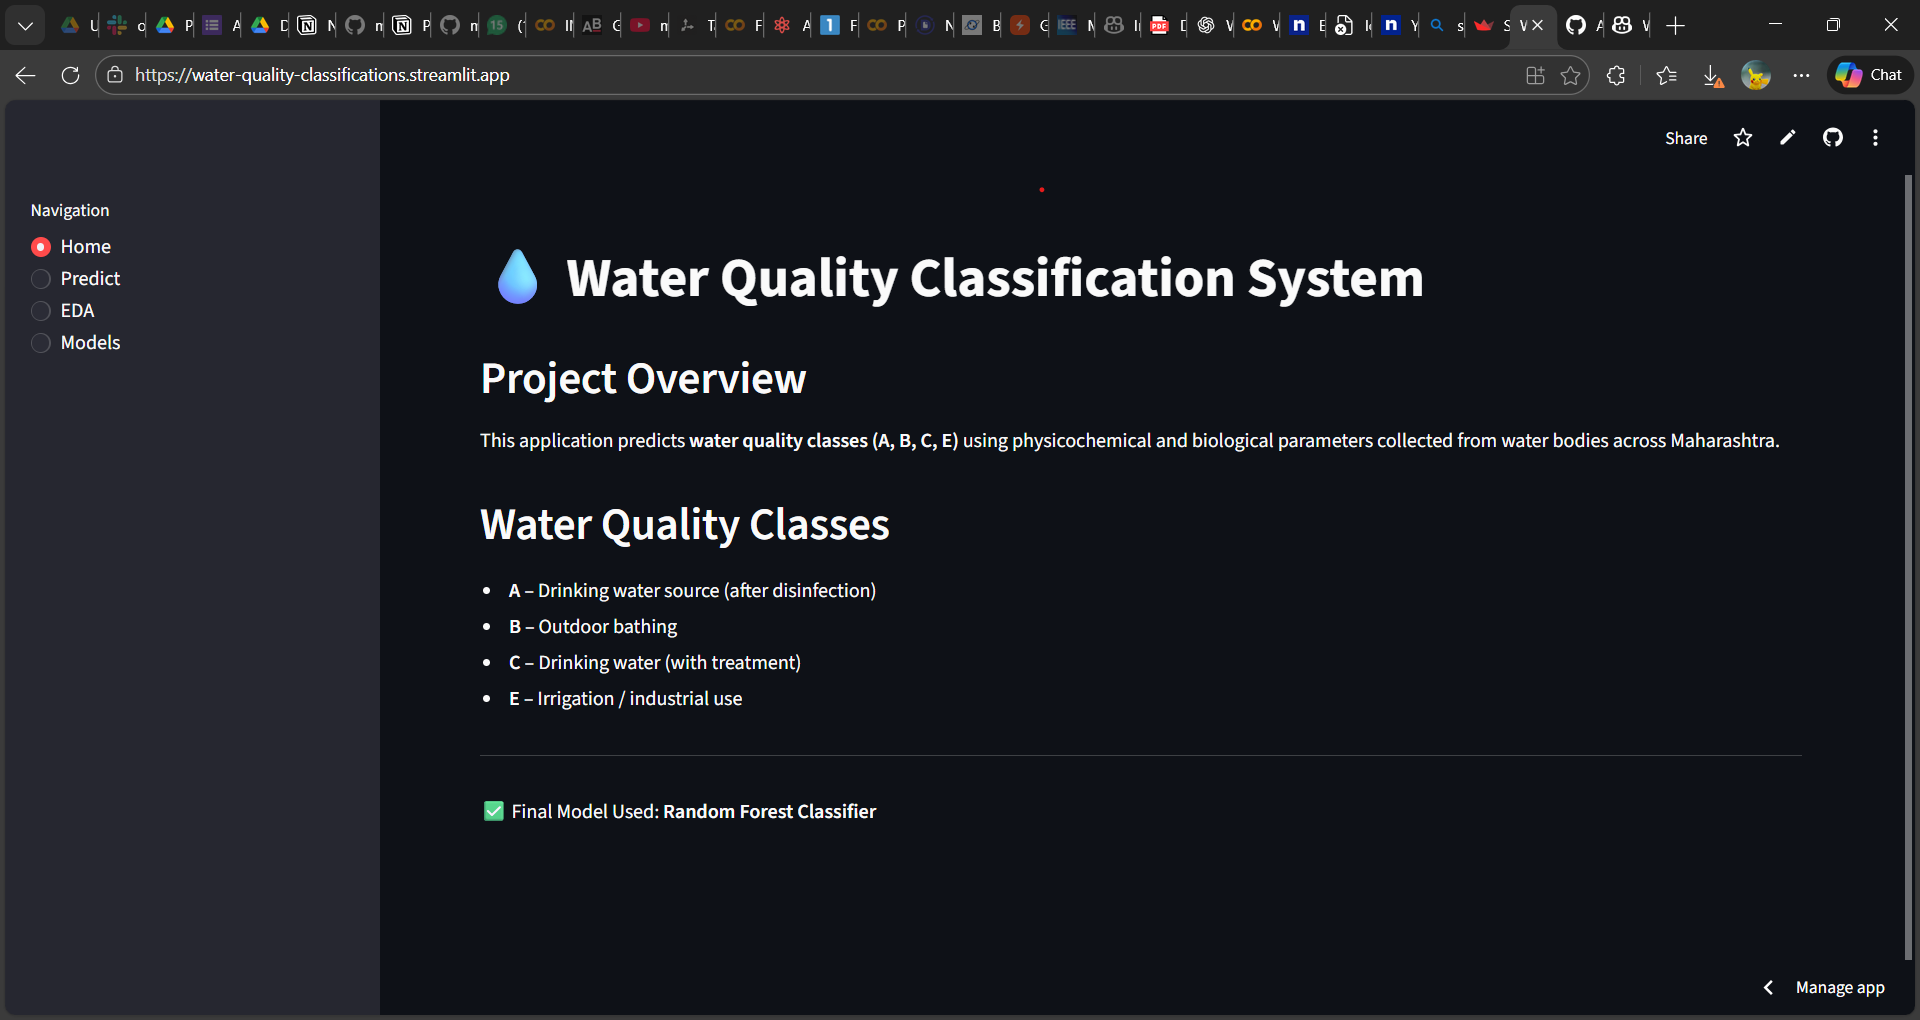

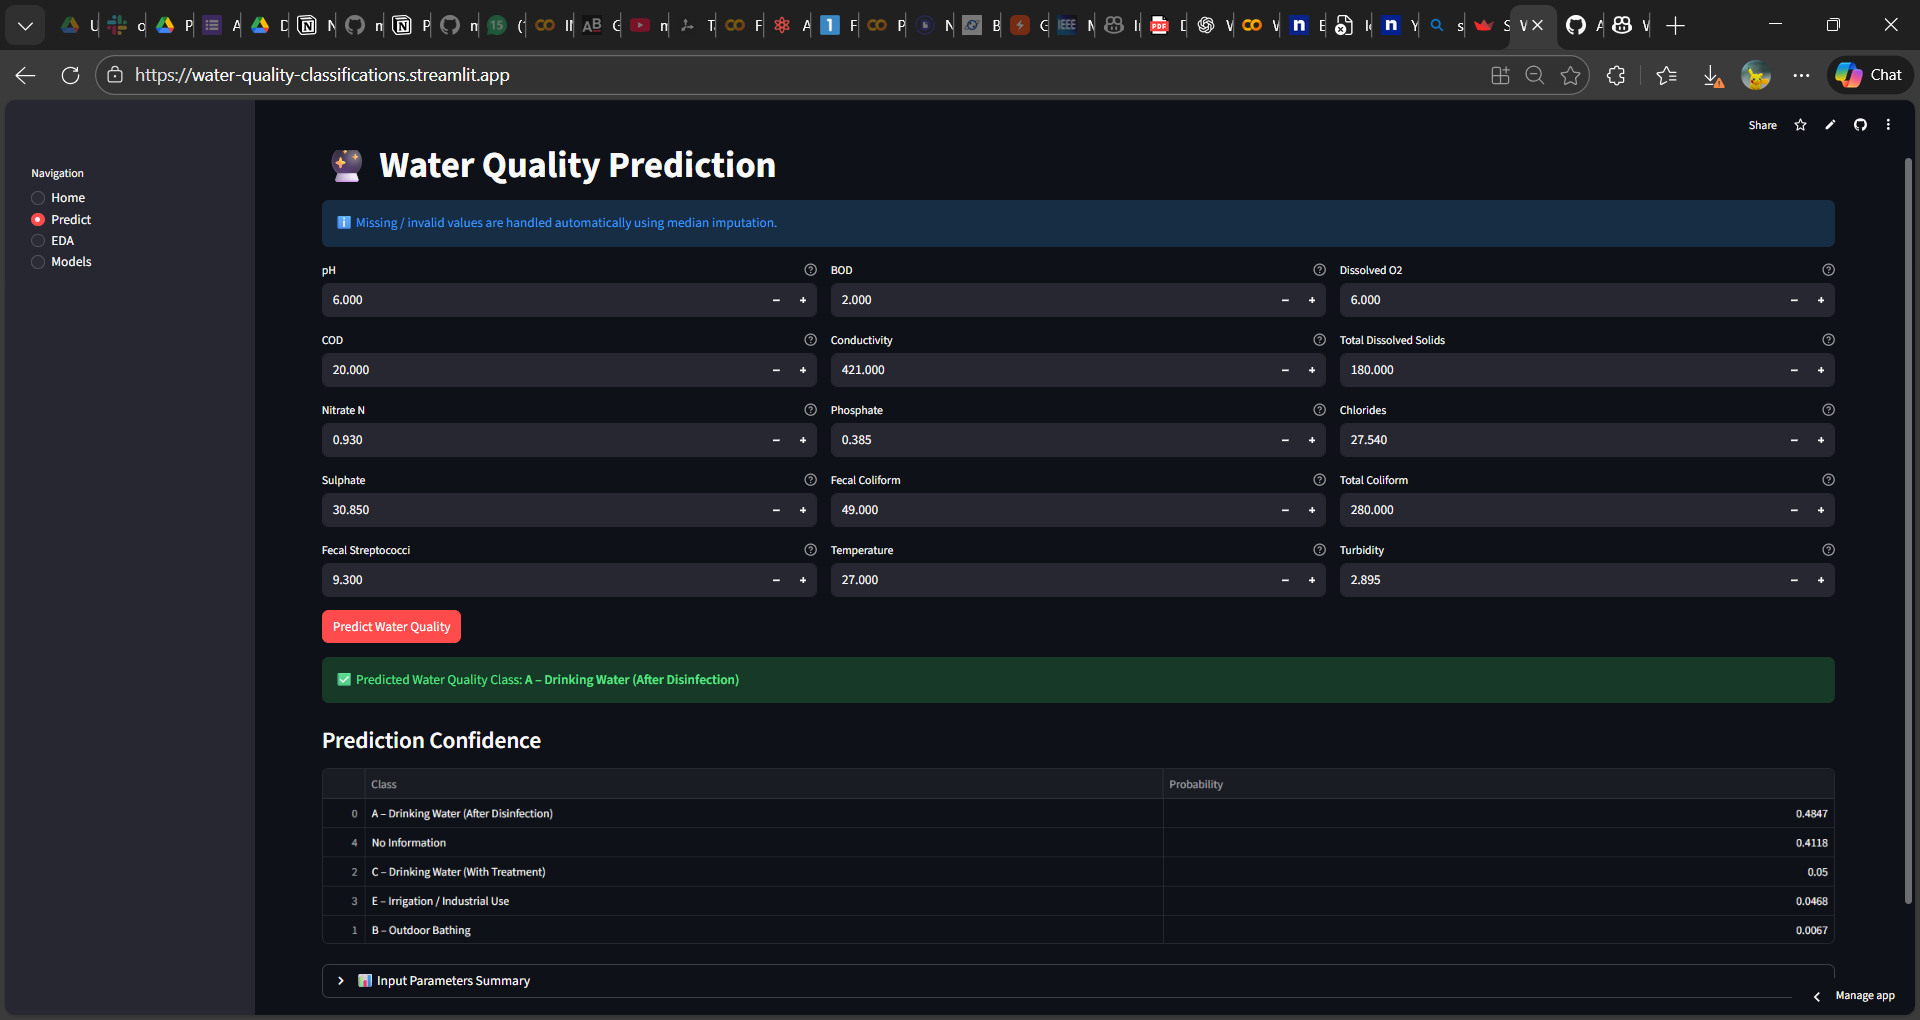

## Implications for Public Health Safety in Maharashtra

Exploratory Data Analysis (EDA) and the performance of our predictive model (specifically the Random Forest Classifier) allows us to draw significant conclusions regarding public health safety in Maharashtra.

### Key EDA Findings and Public Health Risks:

1.  **Distribution of Key Water Quality Parameters**: Our analysis of parameters like pH, BOD, Dissolved O2, Conductivity, Temperature, and Turbidity revealed critical insights into the general state of water quality.
    *   **BOD (Biochemical Oxygen Demand)**: Elevated BOD levels, particularly in districts like Thane and Mumbai, indicate high organic pollution. This consumes dissolved oxygen, harming aquatic life and making water unsafe for human use, potentially leading to gastrointestinal diseases if consumed.
    *   **Dissolved O2**: Low Dissolved O2 levels, often inversely correlated with BOD, suggest a lack of oxygen for aquatic organisms and reduced capacity for natural purification. Water with insufficient oxygen can harbor anaerobic bacteria, posing health risks.
    *   **Fecal Coliform/Fecal Streptococci**: While not extensively visualized in distributions due to data type complexities, their presence (as indicated by feature importance) is a direct marker of fecal contamination, suggesting the presence of pathogens that cause waterborne diseases like cholera, typhoid, and dysentery.
    *   **pH**: Deviations from neutral pH can affect the palatability of water and the effectiveness of disinfection, as well as the solubility of toxic substances.
    *   **Turbidity**: High turbidity suggests suspended solids, which can shield pathogens from disinfectants and indicate the presence of pollutants, affecting water clarity and making it aesthetically unappealing and potentially unsafe.

2.  **Geographic Hotspots**: The district-wise average BOD and river basin-wise average TDS identified specific regions with higher pollution loads.
    *   **Thane, Mumbai, Pune, and Akola (for BOD)**: These districts showed the highest average BOD, indicating significant organic pollution. These areas are likely to have inadequate wastewater treatment or industrial discharge issues, directly impacting the health of communities relying on these water sources.
    *   **Godavari, Krishna, and Panchganga River Basins**: These vital river basins, among others, demonstrated varying levels of pollution, affecting large populations dependent on them for various uses.

3.  **Correlation Analysis**: The heatmap revealed interdependencies between parameters (e.g., strong positive correlation between Conductivity and Total Dissolved Solids), which is crucial for understanding the overall water chemistry and potential synergistic impacts on health.

### Role of the Predictive Model (Random Forest Classifier):

The **Random Forest Classifier** emerged as the best-performing model, achieving a weighted F1-score of **0.84** on the test set. This high performance indicates its strong capability to accurately classify water quality into defined use-based classes (Drinking Water, Outdoor Bathing, Irrigation/Industrial Use).

**Implications for Public Health Interventions:**

1.  **Early Warning System**: The model can serve as an early warning system, predicting water quality deterioration based on routinely monitored parameters. This allows for proactive measures rather than reactive responses to health crises.
2.  **Targeted Resource Allocation**: By accurately classifying water quality, the model can help identify water bodies that are at risk of falling into a lower quality class, or those that are already in unsafe categories. This enables public health authorities to prioritize and allocate resources more effectively to monitor, treat, and protect specific water sources.
3.  **Risk Assessment and Mitigation**: The model's predictions, combined with feature importance (e.g., Fecal Coliform and Temperature being highly influential), can inform detailed risk assessments. For instance, if the model predicts a water body is likely to be classified for 'Irrigation/Industrial Use' when it is actually used for 'Drinking Water', this immediately flags a high-risk scenario.
4.  **Informing Policy and Regulation**: Consistent application of the predictive model can provide data-driven evidence to support the development and enforcement of stricter environmental regulations and public health policies related to water quality standards.
5.  **Public Awareness and Education**: The model's insights can be simplified and communicated to the public to raise awareness about local water quality issues and encourage safe water practices, such as boiling water or using alternative sources when necessary.

### Specific Examples/Scenarios for Decision-Making:

*   **Scenario 1: Predicting Contamination Events**: During monsoon seasons, runoff can significantly increase fecal coliform levels. The model, fed with real-time or near real-time data, could predict a shift from 'Drinking Water (after disinfection)' to 'Outdoor Bathing' or even 'Unsafe' status in certain river stretches. This would trigger immediate alerts for municipalities to issue boil-water advisories or temporarily shut down water intakes, preventing widespread outbreaks of waterborne diseases.
*   **Scenario 2: Industrial Discharge Monitoring**: In areas with heavy industrial presence (e.g., around Thane), the model could predict 'Irrigation/Industrial Use' classification for a river section. If this section is downstream from a community's water source, it would prompt regulatory bodies to investigate industrial discharge practices and enforce compliance with pollution control standards, safeguarding both drinking water and agricultural produce.
*   **Scenario 3: Prioritizing Infrastructure Investment**: Districts consistently predicted to have poor water quality (e.g., high BOD and low DO) by the model, especially those identified as 'hotspots' in EDA, could be prioritized for investment in new water treatment plants, improved sanitation infrastructure, or enhanced water quality monitoring stations.

In conclusion, the integration of comprehensive EDA and a robust predictive model offers a powerful toolkit for public health decision-makers in Maharashtra to understand, anticipate, and manage water quality risks, thereby protecting the health and well-being of its citizens.

##Conclusion
The analysis of water quality in Maharashtra has provided significant insights and a robust predictive tool for public health safety. The key findings from our comprehensive exploratory data analysis (EDA) highlight the critical interplay of physicochemical and biological parameters, revealing hotspots of pollution and their potential health risks. The Random Forest Classifier stands out as a highly effective model for water quality classification, offering actionable intelligence for proactive management and resource allocation. Moving forward, integrating real-time data and advanced analytics into a deployable application will be crucial for continuous monitoring, early warning systems, and ultimately, safeguarding public health and environmental sustainability in Maharashtra.